# Load Model

In [1]:
import openvino as ov

core = ov.Core()

model = core.read_model(model='models/face-detection-adas-0001.xml')
compiled_model = core.compile_model(model = model, device_name = "CPU")

input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

print("Input shape:", input_layer.shape)
print("output shape:", output_layer.shape)

Input shape: [1,3,384,672]
output shape: [1,1,200,7]


# Preprocess New Input Data

### Call Image


(6720, 4480, 3)
(1344, 896, 3)


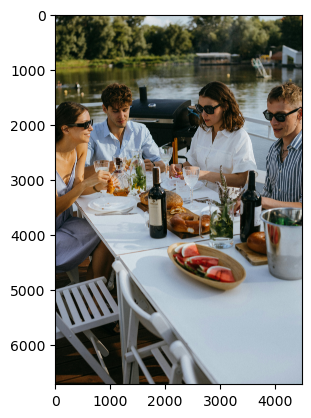

In [2]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("data/people2.jpg")
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

image_height, image_width, image_channels = image.shape
image = cv2.resize(image, (int(image_width/5), int(image_height/5)))
print(image.shape)

cv2.imshow("Image", image)
cv2.waitKey()
cv2.destroyAllWindows()

# Preprocess Data(데이터 전처리)

In [3]:
import numpy as np

In [5]:
def preprocess(image):

        resized_image = cv2.resize(image, (672, 384))
        transposed_image = resized_image.transpose(2,0,1)
        input_image = np.expand_dims(transposed_image,0)
        
        return input_image

In [6]:
input_image = preprocess(image)

print(image.shape)
print(input_image.shape)

(1344, 896, 3)
(1, 3, 384, 672)


# Run Interface

In [7]:
results = compiled_model([input_image])[output_layer]

In [8]:
print(results.shape)

(1, 1, 200, 7)


# Postprocess

In [9]:
def find_faceboxes(image, results, confidence_threshold):
    results = results.squeeze()

    scores = results[:, 2]
    boxes  = results[:, -4:]

    face_boxes = boxes[scores >= confidence_threshold]
    scores = scores[scores >= confidence_threshold]

    image_h, image_w, image_channels = image.shape
    face_boxes = face_boxes*np.array([image_w, image_h, image_w, image_h])
    face_boxes = face_boxes.astype(np.int64)

    return face_boxes, scores

In [10]:
confidence_threshold = .95
face_boxes, scores = find_faceboxes(image, results, confidence_threshold)
print(face_boxes) #AI 모델이 생각하는 얼굴 위치

[[191 302 273 415]
 [516 295 611 414]
 [772 317 873 457]
 [ 45 346 137 466]]


In [11]:
print(scores)

[0.9999931 0.9999838 0.9994967 0.9954615]


In [12]:
def draw_faceboxes(image, face_boxes, scores):
    
    show_image = image.copy()

    for i in range(len(face_boxes)):
        xmin, ymin, xmax, ymax = face_boxes[i]
        cv2.rectangle(img=show_image, pt1=(xmin, ymin), pt2=(xmax, ymax), color=(0, 200, 0), thickness=2)

    return show_image

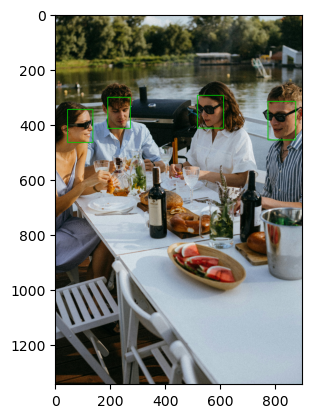

In [13]:
show_image = draw_faceboxes(image, face_boxes, scores)

plt.imshow(cv2.cvtColor(show_image, cv2.COLOR_BGR2RGB))

In [14]:
cv2.imshow("Face  Detection", show_image)
cv2.waitKey()
cv2.destroyAllWindows()